In [1]:
from bound_probs.utils.data import get_dataset
from bound_probs.cogmodels import build_model
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

# Increase font size for better visibility in plots
sns.set_context("paper", font_scale=1.5)

In [2]:
df = get_dataset()

In [3]:
palette = sns.color_palette('icefire', 3)
palette

[(0.25423116, 0.40433127, 0.78155831),
 (0.12284806, 0.1179729, 0.11772022),
 (0.72401436, 0.20691287, 0.25027366)]

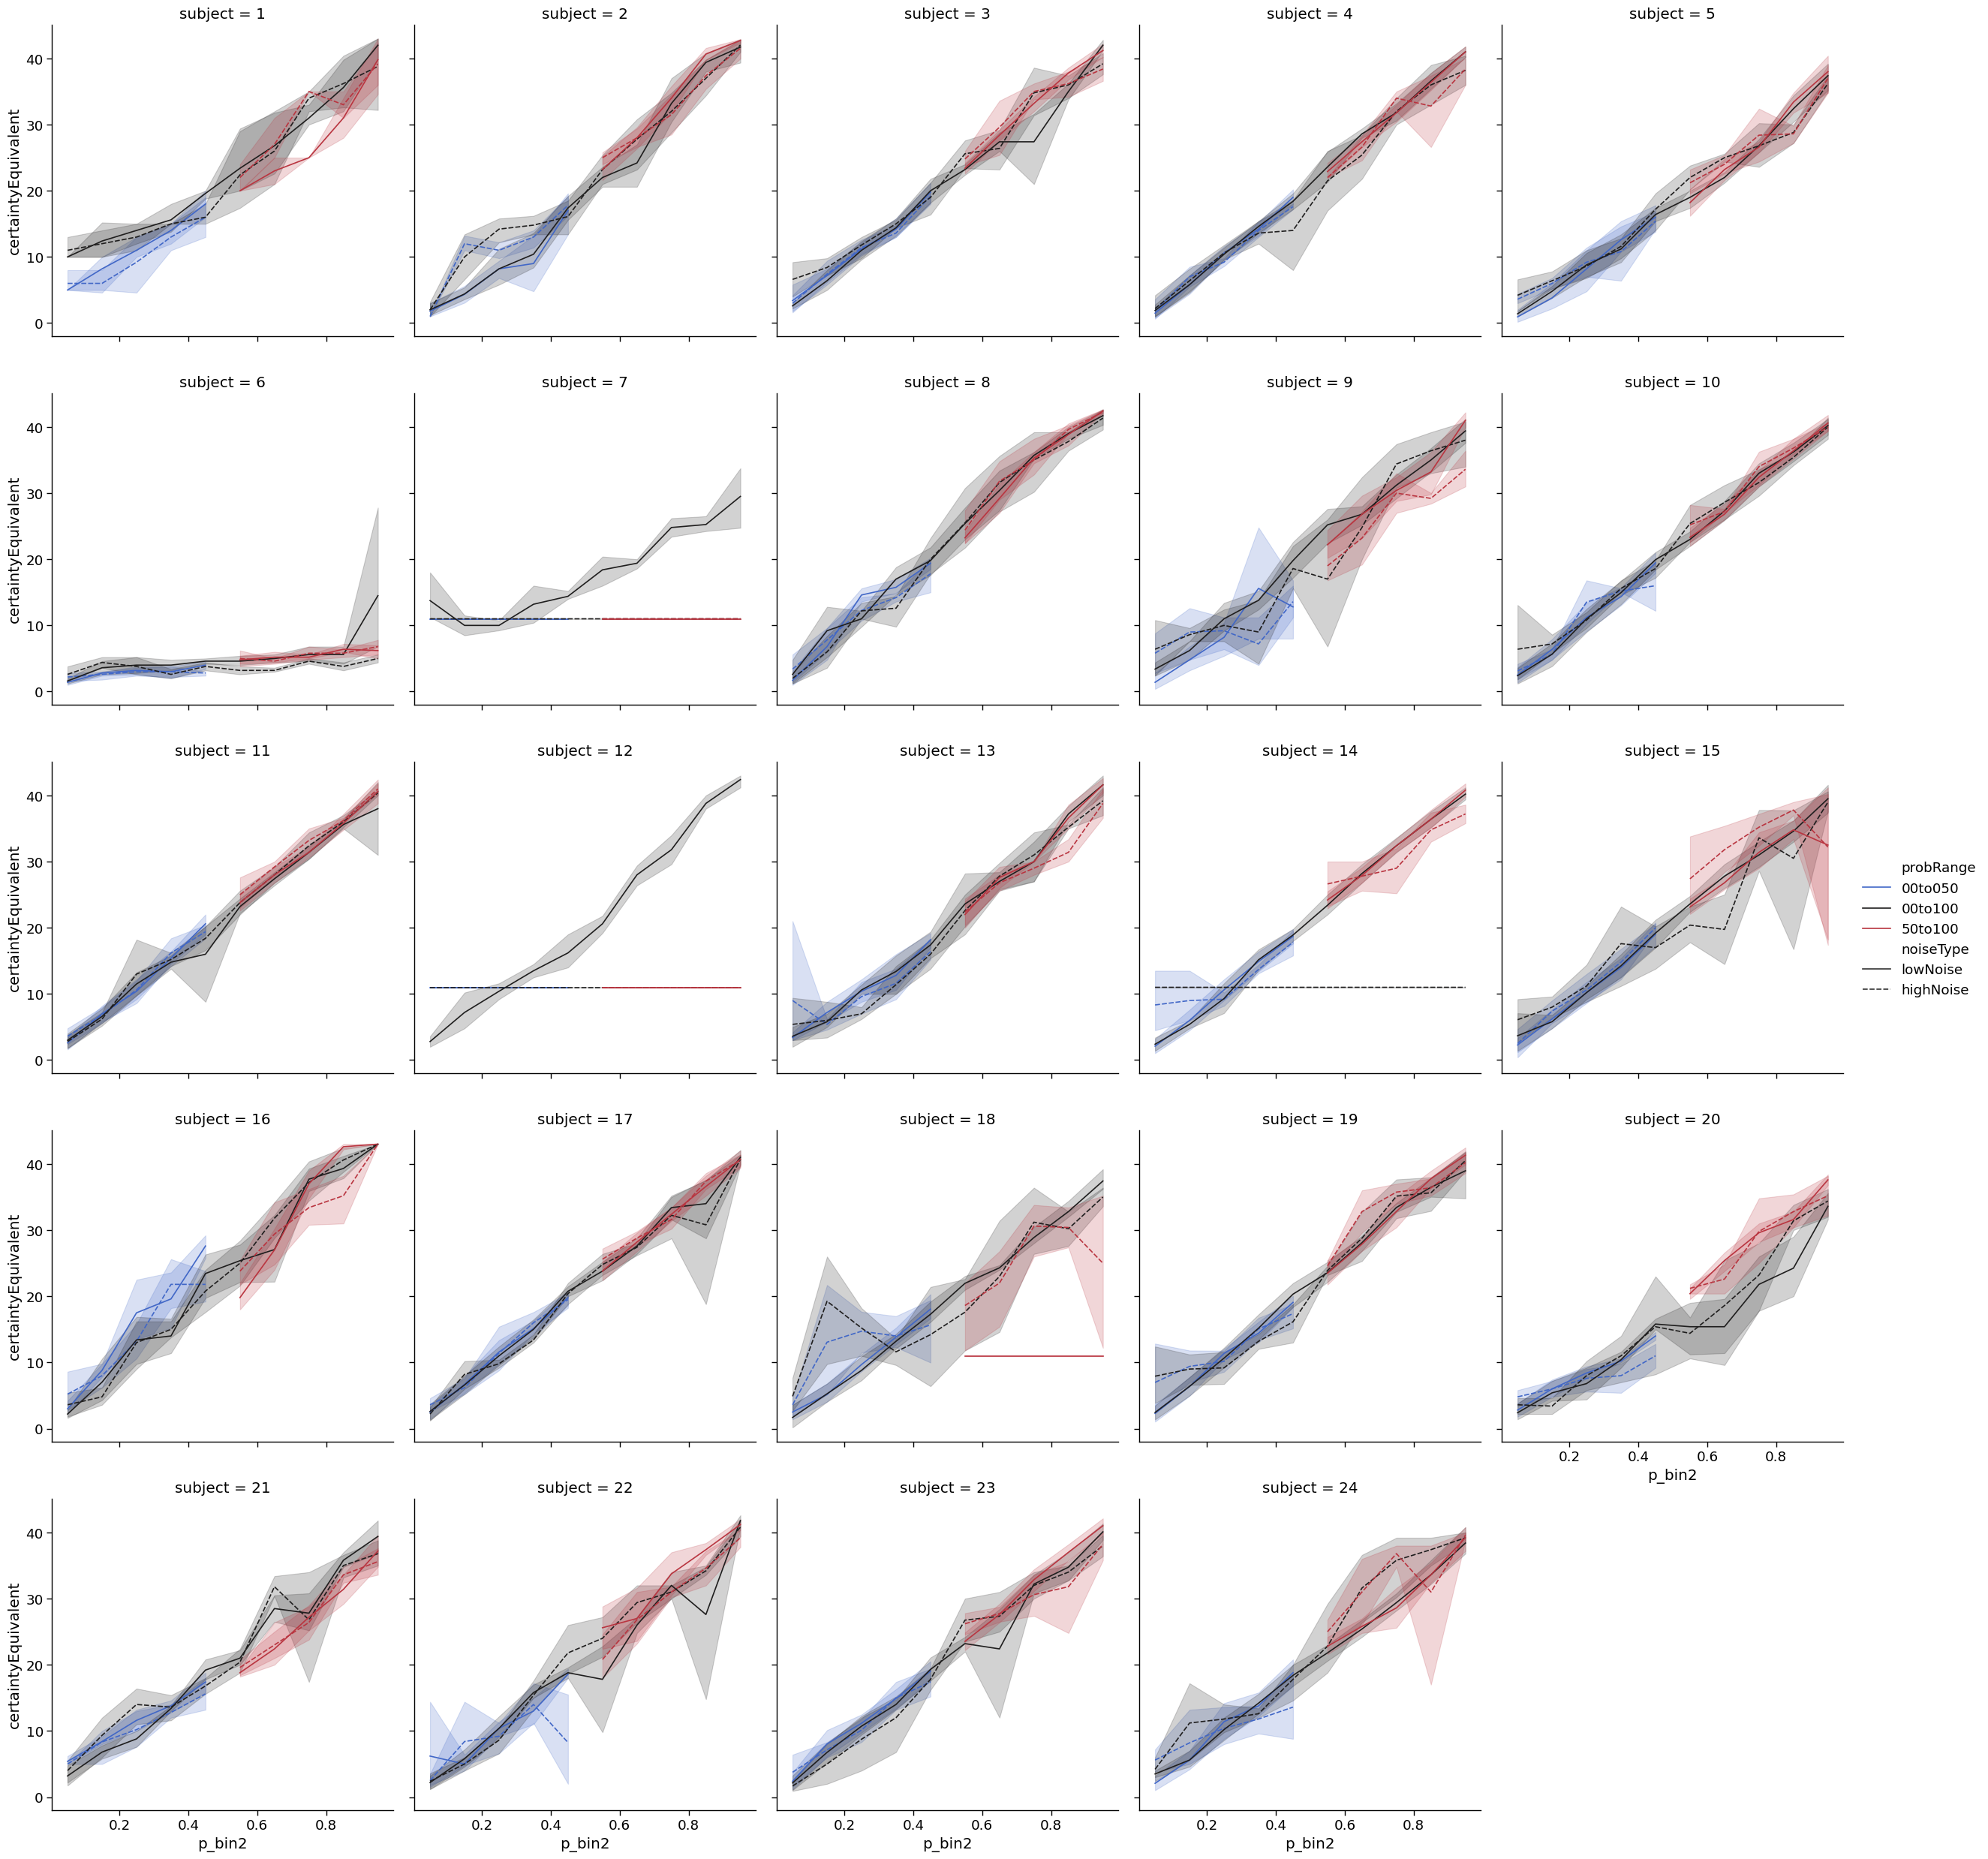

In [4]:
palette = sns.color_palette('icefire', 3)

sns.relplot(df.reset_index(), col='subject', hue='probRange', style='noiseType', col_wrap=5,
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='certaintyEquivalent', kind='line')

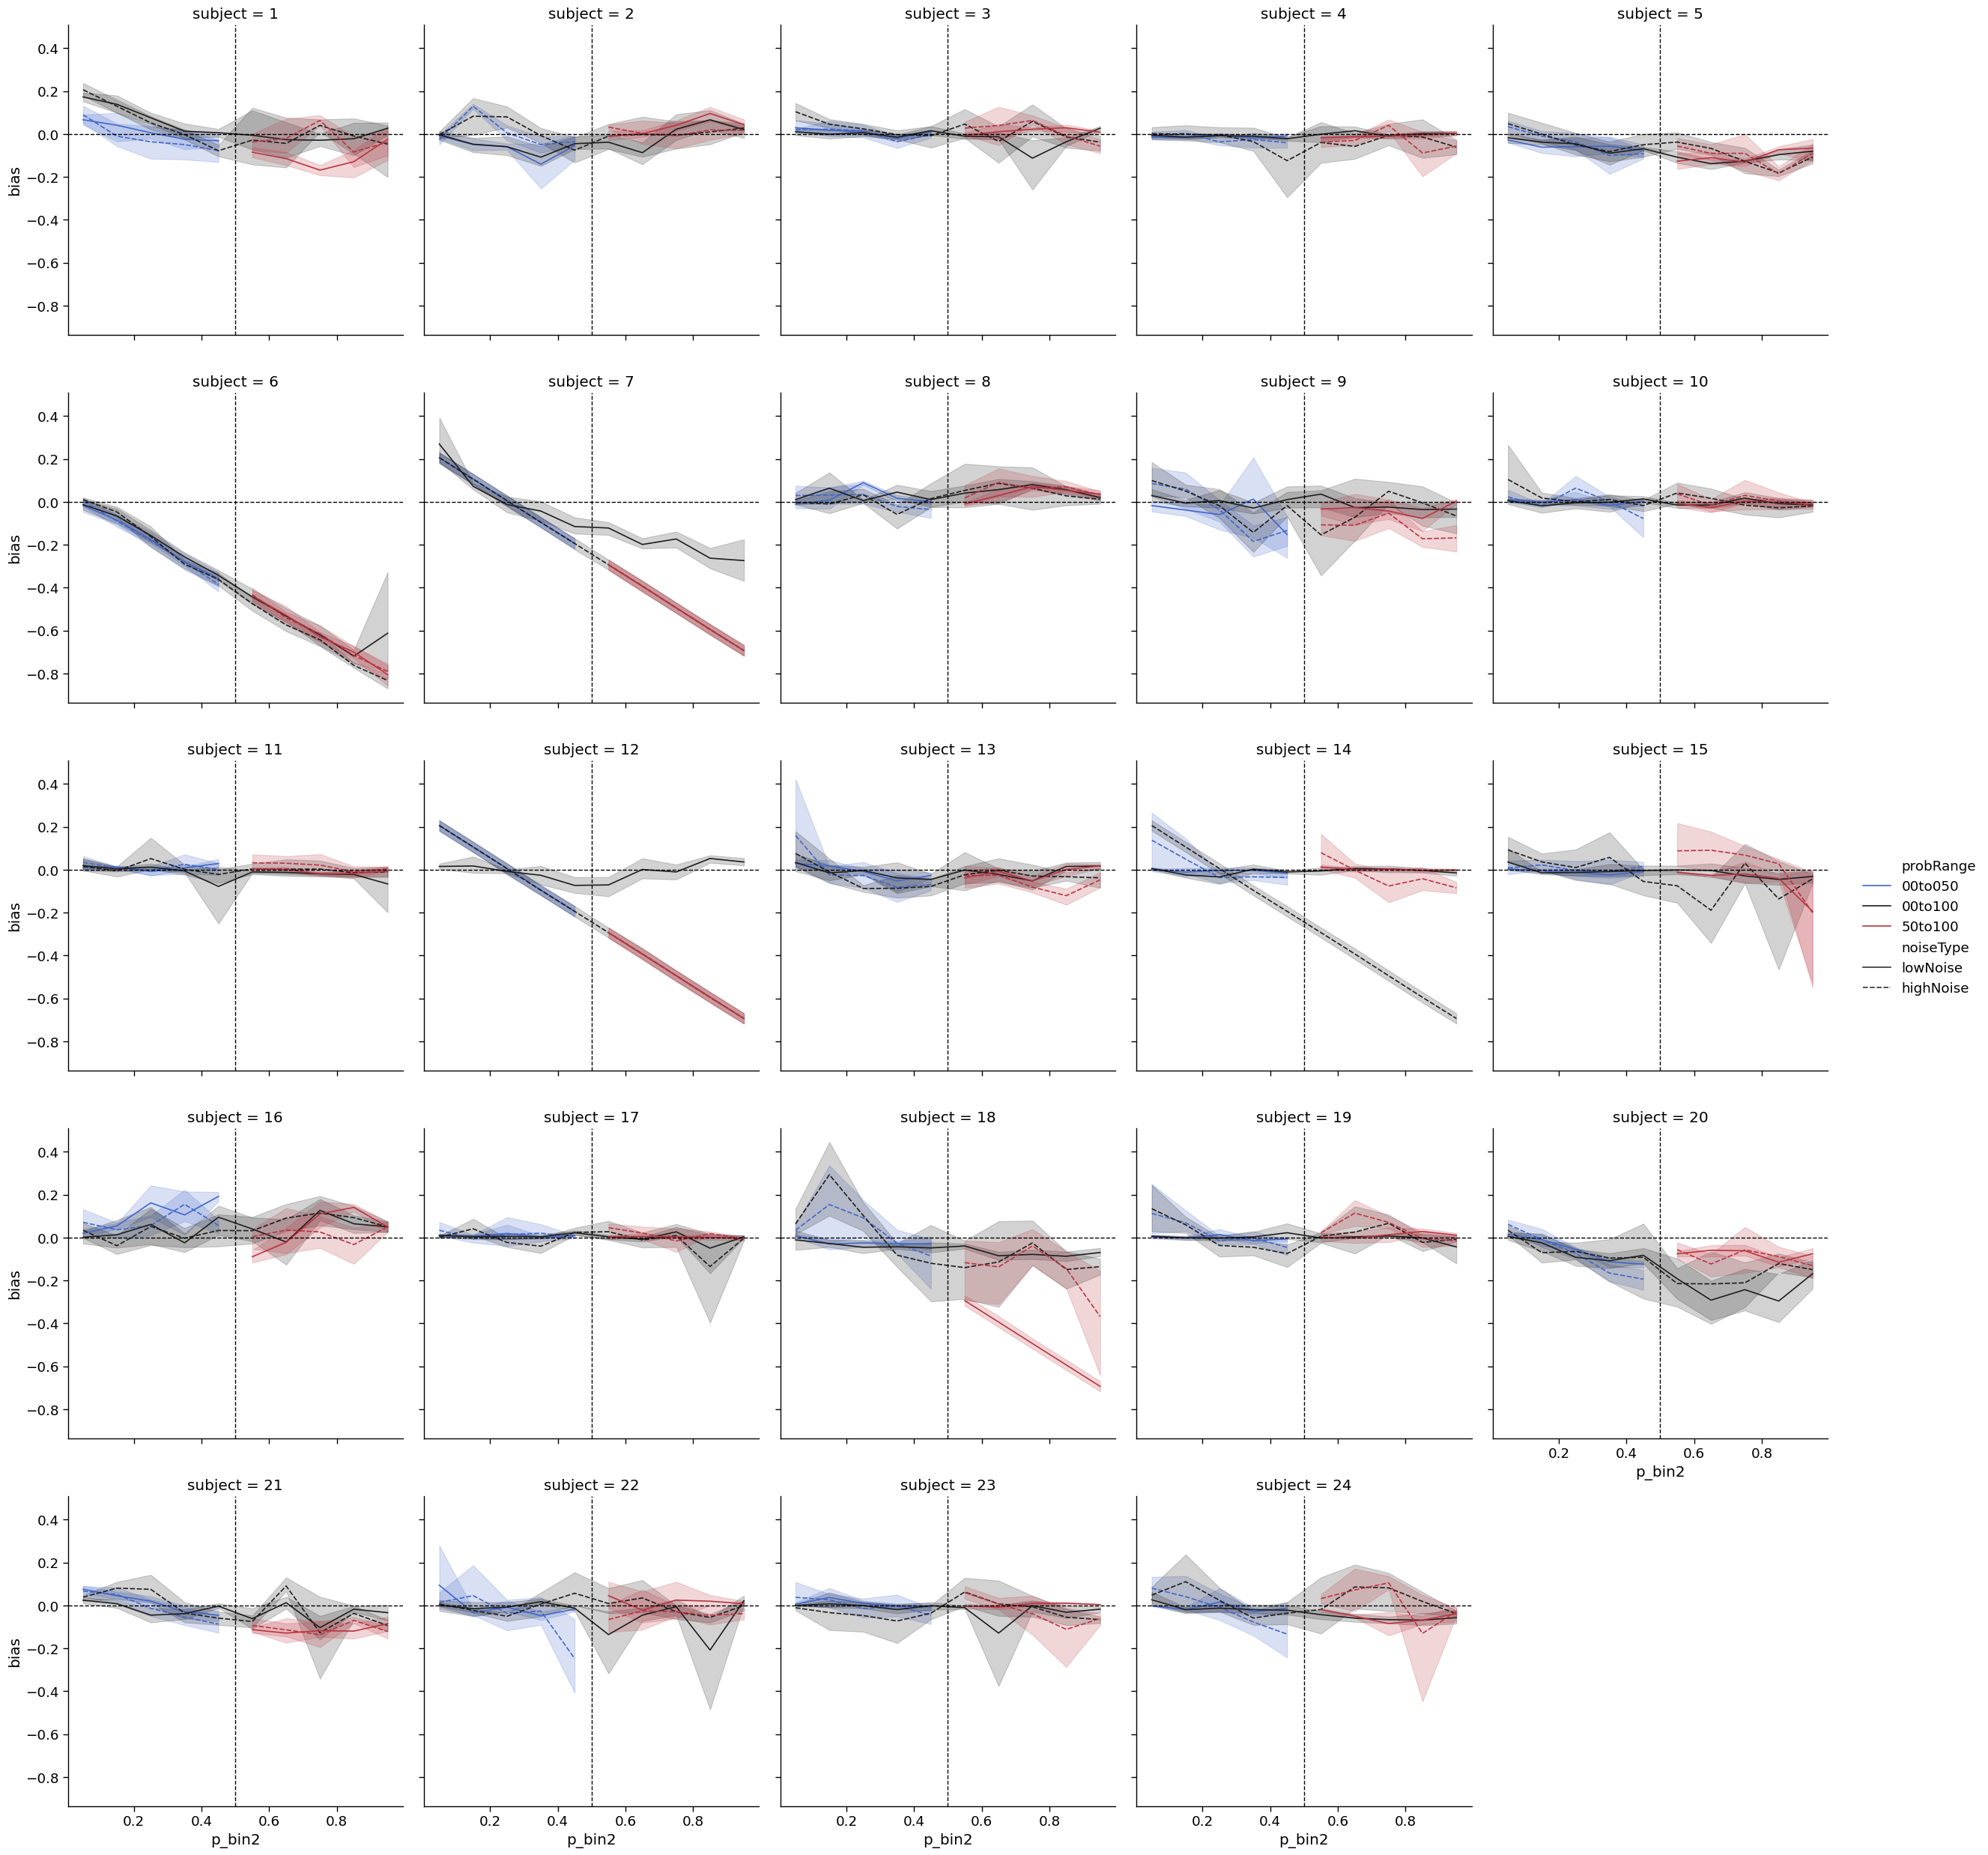

In [5]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(df.reset_index(), col='subject', hue='probRange', style='noiseType', col_wrap=5,
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='bias', kind='line')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


In [6]:
df

probRange outputRange  noiseType  \
subject runNumber trialNumber                                    
3       1         1             00to100     00to100   lowNoise   
                  2             00to100     00to100   lowNoise   
                  3             00to100     00to100   lowNoise   
                  4             00to100     00to100   lowNoise   
                  5             00to100     00to100   lowNoise   
...                                 ...         ...        ...   
22      6         21            00to050     00to100  highNoise   
                  22            00to050     00to100  highNoise   
                  23            00to050     00to100  highNoise   
                  24            00to050     00to100  highNoise   
                  25            00to050     00to100  highNoise   

                               trialStartTime  presentedProb_1  \
subject runNumber trialNumber                                    
3       1         1                  0.156715               35   
                  2                 11.674922                5   
                  3                 23.072724               89   
                  4                 34.563811               59   
                  5                 46.056960               69   
...                                       ...              ...   
22      6         21               230.043129             1175   
                  22               241.550938             3072   
                  23               253.047445              154   
                  24               264.552890             1165   
                  25               276.058965              849   

                               presentedProb_2  certaintyEquivalent  \
subject runNumber trialNumber                                         
3       1         1                        100                 14.0   
                  2                        100                  3.0   
                  3                        100                 35.0   
                  4                        100                 24.0   
                  5                        100                 29.0   
...                                        ...                  ...   
22      6         21                      3016                 12.0   
                  22                      9295                 10.0   
                  23                      3195                  2.0   
                  24                      2596                  9.0   
                  25                      7755                  4.0   

                               responseTime invalidResponses answer  ...  \
subject runNumber trialNumber                                        ...   
3       1         1               11.000001              NaN    yes  ...   
                  2               11.000001              NaN    yes  ...   
                  3               11.000002              NaN    yes  ...   
                  4               11.000001              NaN    yes  ...   
                  5               11.000001              NaN    yes  ...   
...                                     ...              ...    ...  ...   
22      6         21              11.000001              NaN    yes  ...   
                  22              11.000001              NaN    yes  ...   
                  23              11.000001              NaN    yes  ...   
                  24              11.000001              NaN    yes  ...   
                  25              11.000001              NaN    yes  ...   

                              lotteryStartTimings lotteryEndTimings  \
subject runNumber trialNumber                                         
3       1         1                           0.5              11.5   
                  2                          12.0              23.0   
                  3                          23.5              34.5   
                  4                         

In [7]:
df.groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean()

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/2579777784.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean()


certaintyEquivalent      bias
subject p_bin2             probRange noiseType                               
1       0.05               00to050   highNoise                  6.0  0.089886
                                     lowNoise                   5.0  0.066279
                           00to100   highNoise                 11.0  0.206165
                                     lowNoise                  10.0  0.172558
                           50to100   highNoise                  NaN       NaN
...                                                             ...       ...
24      0.9500000000000002 00to050   lowNoise                   NaN       NaN
                           00to100   highNoise                 39.2 -0.038003
                                     lowNoise                  38.4 -0.056977
                           50to100   highNoise                 39.6 -0.028700
                                     lowNoise                  39.2 -0.038372

[1440 rows x 2 columns]

# Without problematic subjects

In [8]:
problematic_subjects = [6,7,12,18]

filtered_df = df.drop(problematic_subjects, level='subject')

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/1403013770.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.relplot(filtered_df.groupby(['subject', 'p_bin', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType',


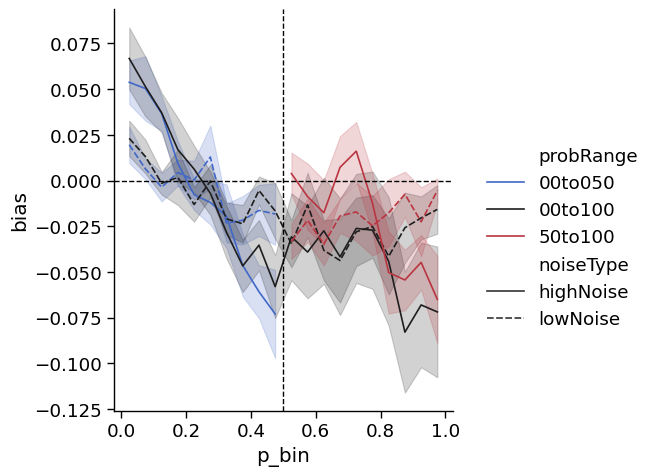

In [9]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(filtered_df.groupby(['subject', 'p_bin', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType', 
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin', y='bias', kind='line',
            errorbar='se')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/3035361002.py:36: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  g2 = sns.relplot(


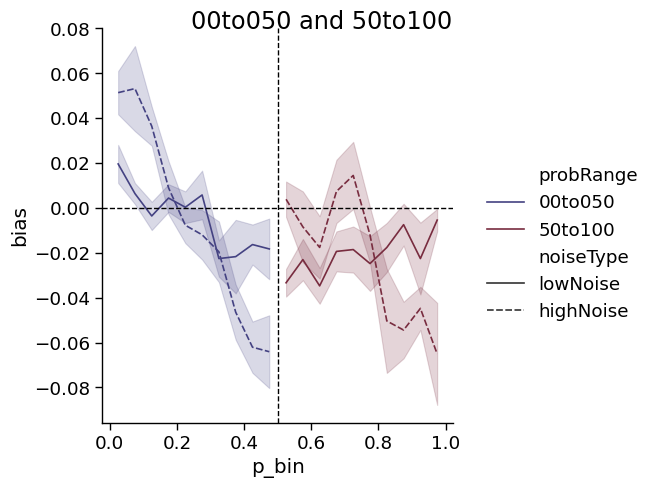

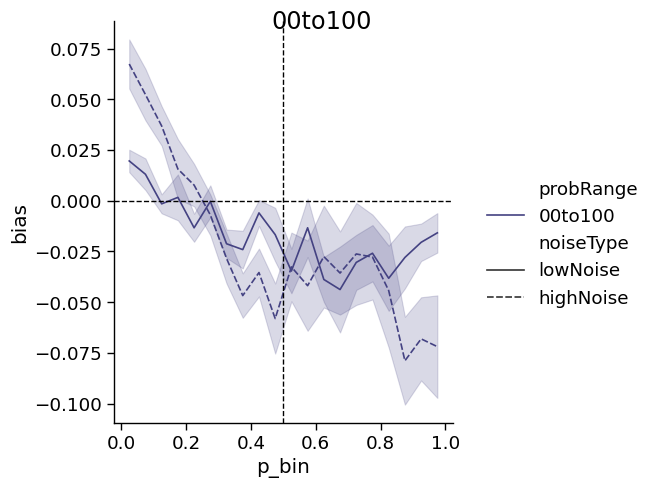

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'problematic_subjects' is defined

# Filter data for 00to050 and 50to100
filtered_data_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100
filtered_data_00to100 = df[
    (df['probRange'] == '00to100') & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Define color palette
palette = sns.color_palette('icefire', 2)

# Create separate line plots
g1 = sns.relplot(
    data=filtered_data_00to050_50to100,
    hue='probRange',
    style='noiseType',
    hue_order=['00to050', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1.fig.suptitle('00to050 and 50to100')

g2 = sns.relplot(
    data=filtered_data_00to100,
    hue='probRange',
    style='noiseType',
    hue_order=['00to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2.fig.suptitle('00to100')

plt.show()


# Statistical tests

# High noise

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/2425523569.py:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ip

P-value for 00to050 vs 00to100: 0.5339359723215708
P-value for 50to100 vs 00to100: 0.04965507493610954
Mean Bias Difference for 00to050 vs 00to100: -0.007289652988622453
Mean Bias Difference for 50to100 vs 00to100: 0.03138788371390281


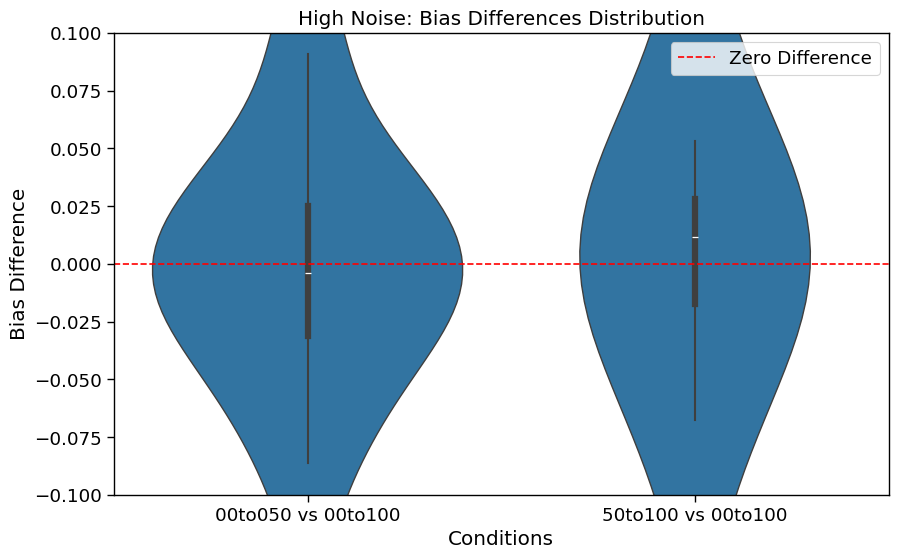

In [77]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data for highNoise condition
high_noise_df = filtered_df[filtered_df['noiseType'] == 'highNoise']

bin_size = 0.2

# Specify the probRange conditions for comparison
conditions_to_compare = [('00to050', '00to100', 0.5-bin_size, 0.5), ('50to100', '00to100', 0.5, 0.5+bin_size)]

# Create empty lists to store average bias for each condition
average_bias_00to050 = []
average_bias_00to100 = []
average_bias_50to100 = []
bias_differences = []

# Iterate over subjects
for subject_id, subject_data in high_noise_df.groupby('subject'):

    # Perform paired t-tests for specified conditions and p-value bins
    for condition_pair in conditions_to_compare:
        condition_1, condition_2, p_bin_start, p_bin_end = condition_pair

        # Filter NaN values
        subset_1 = subject_data[(subject_data['probRange'] == condition_1)]
        subset_2 = subject_data[(subject_data['probRange'] == condition_2)]

        # Filter rows within the specified p-value bin
        subset_1 = subset_1[(subset_1['p'] >= p_bin_start) & (subset_1['p'] < p_bin_end)]
        subset_2 = subset_2[(subset_2['p'] >= p_bin_start) & (subset_2['p'] < p_bin_end)]

        # Check if there are enough non-NaN values for the t-test
        if len(subset_1) >= 2 and len(subset_2) >= 2:

            # Append average bias for each condition
            if condition_1 == '00to050':
                average_bias_00to050.append(subset_1['bias'].mean())
            elif condition_1 == '50to100':
                average_bias_50to100.append(subset_1['bias'].mean())

            if condition_2 == '00to100':
                average_bias_00to100.append(subset_2['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = subset_1['bias'].mean() - subset_2['bias'].mean()
            bias_differences.append({
                'Subject': subject_id,
                'Condition': f'{condition_1} vs {condition_2}',
                'Bias Difference': bias_difference
            })

# Perform a within-subjects t-test
t_test_result_00to050_00to100 = pg.ttest(average_bias_00to050, average_bias_00to100, paired=True)
t_test_result_50to100_00to100 = pg.ttest(average_bias_50to100, average_bias_00to100, paired=True)

print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
print(f"P-value for 50to100 vs 00to100: {t_test_result_50to100_00to100['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_df = pd.DataFrame(bias_differences)
# Calculate the mean of the bias differences for each condition
mean_bias_difference_00to050 = bias_differences_df[bias_differences_df['Condition'] == '00to050 vs 00to100']['Bias Difference'].mean()
mean_bias_difference_50to100 = bias_differences_df[bias_differences_df['Condition'] == '50to100 vs 00to100']['Bias Difference'].mean()

print(f"Mean Bias Difference for 00to050 vs 00to100: {mean_bias_difference_00to050}")
print(f"Mean Bias Difference for 50to100 vs 00to100: {mean_bias_difference_50to100}")
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Bias Difference', data=bias_differences_df)
plt.title('High Noise: Bias Differences Distribution')
plt.xlabel('Conditions')
plt.ylabel('Bias Difference')
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.legend()
plt.show()


# Low noise

/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/51568542.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipyk

P-value for 00to050 vs 00to100: 0.7405957341264318
P-value for 50to100 vs 00to100: 0.7311883938202245
Mean Bias Difference for 00to050 vs 00to100: -0.004065180878552971
Mean Bias Difference for 50to100 vs 00to100: 0.004572351421188627


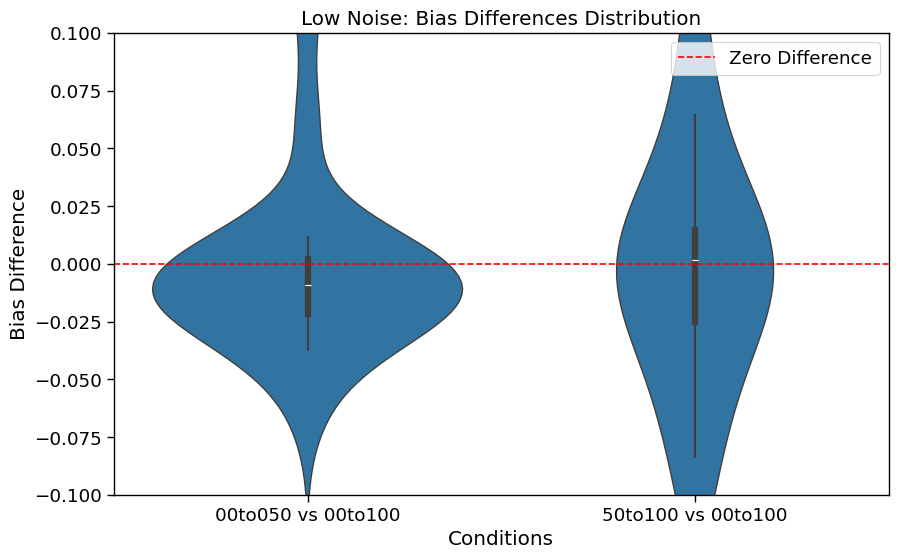

In [80]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Select the relevant data for highNoise condition
high_noise_df = filtered_df[filtered_df['noiseType'] == 'lowNoise']

# Specify the probRange conditions for comparison
conditions_to_compare = [('00to050', '00to100', 0.5-bin_size, 0.5), ('50to100', '00to100', 0.5, 0.5+bin_size)]

# Create empty lists to store average bias for each condition
average_bias_00to050 = []
average_bias_00to100 = []
average_bias_50to100 = []
bias_differences = []

# Iterate over subjects
for subject_id, subject_data in high_noise_df.groupby('subject'):

    # Perform paired t-tests for specified conditions and p-value bins
    for condition_pair in conditions_to_compare:
        condition_1, condition_2, p_bin_start, p_bin_end = condition_pair

        # Filter NaN values
        subset_1 = subject_data[(subject_data['probRange'] == condition_1)]
        subset_2 = subject_data[(subject_data['probRange'] == condition_2)]

        # Filter rows within the specified p-value bin
        subset_1 = subset_1[(subset_1['p'] >= p_bin_start) & (subset_1['p'] < p_bin_end)]
        subset_2 = subset_2[(subset_2['p'] >= p_bin_start) & (subset_2['p'] < p_bin_end)]

        # Check if there are enough non-NaN values for the t-test
        if len(subset_1) >= 2 and len(subset_2) >= 2:
            t_test_result = pg.ttest(subset_1['bias'], subset_2['bias'], paired=True)

            # Append average bias for each condition
            if condition_1 == '00to050':
                average_bias_00to050.append(subset_1['bias'].mean())
            elif condition_1 == '50to100':
                average_bias_50to100.append(subset_1['bias'].mean())

            if condition_2 == '00to100':
                average_bias_00to100.append(subset_2['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = subset_1['bias'].mean() - subset_2['bias'].mean()
            bias_differences.append({
                'Subject': subject_id,
                'Condition': f'{condition_1} vs {condition_2}',
                'Bias Difference': bias_difference
            })

# Perform a within-subjects t-test
t_test_result_00to050_00to100 = pg.ttest(average_bias_00to050, average_bias_00to100, paired=True)
t_test_result_50to100_00to100 = pg.ttest(average_bias_50to100, average_bias_00to100, paired=True)

print(f"P-value for 00to050 vs 00to100: {t_test_result_00to050_00to100['p-val'][0]}")
print(f"P-value for 50to100 vs 00to100: {t_test_result_50to100_00to100['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_df = pd.DataFrame(bias_differences)
# Calculate the mean of the bias differences for each condition
mean_bias_difference_00to050 = bias_differences_df[bias_differences_df['Condition'] == '00to050 vs 00to100']['Bias Difference'].mean()
mean_bias_difference_50to100 = bias_differences_df[bias_differences_df['Condition'] == '50to100 vs 00to100']['Bias Difference'].mean()

print(f"Mean Bias Difference for 00to050 vs 00to100: {mean_bias_difference_00to050}")
print(f"Mean Bias Difference for 50to100 vs 00to100: {mean_bias_difference_50to100}")
# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Condition', y='Bias Difference', data=bias_differences_df)
plt.title('Low Noise: Bias Differences Distribution')
plt.xlabel('Conditions')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


# Noise condition

# Around 0.5

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/4053412343.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")


P-value for 00to050 in High Noise vs Low Noise: 0.001562005136850075
P-value for 50to100 in High Noise vs Low Noise: 0.016408967582531662
P-value for 00to100 in High Noise vs Low Noise: 0.38693621096860653


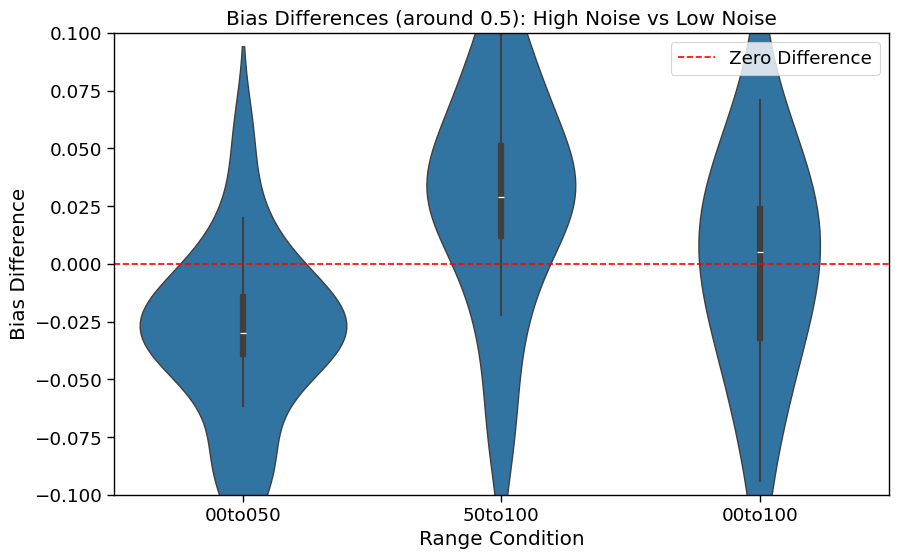

In [83]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the range conditions
range_conditions = ['00to050', '50to100', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):

        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 0.5 - bin_size) & (high_noise_data['p'] < 0.5 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 0.5 - bin_size) & (low_noise_data['p'] < 0.5 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Print t-test results
for range_cond in range_conditions:
    print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df)
plt.title('Bias Differences (around 0.5): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


# Above 0.1

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/1993654143.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")


P-value for 00to050 in High Noise vs Low Noise: 0.0007542401979038092
P-value for 00to100 in High Noise vs Low Noise: 0.0038436290392195377


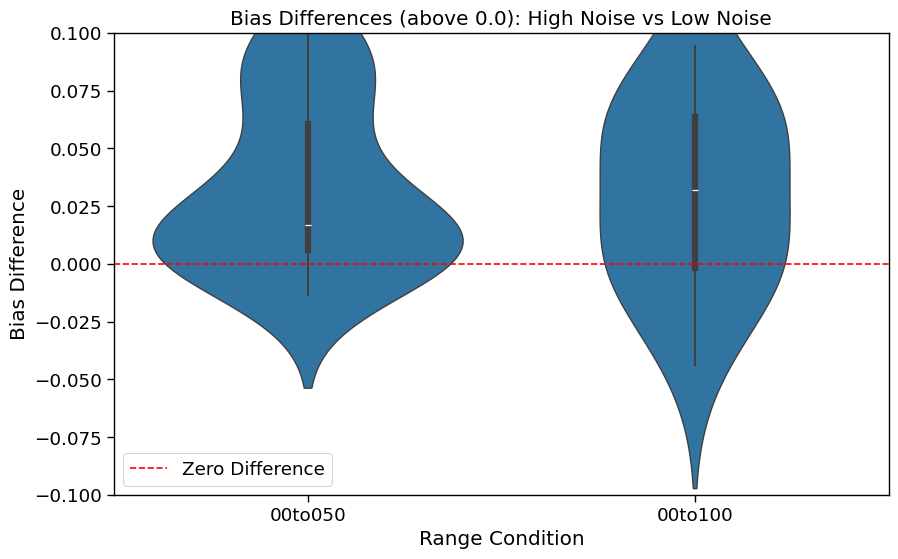

In [87]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the range conditions
range_conditions = ['00to050', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):

        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 0.0 - bin_size) & (high_noise_data['p'] < 0.0 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 0.0 - bin_size) & (low_noise_data['p'] < 0.0 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Print t-test results
for range_cond in range_conditions:
    print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df)
plt.title('Bias Differences (above 0.0): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


# Below 1.0

/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_29053/3795066290.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")


P-value for 50to100 in High Noise vs Low Noise: 0.0012665713854605198
P-value for 00to100 in High Noise vs Low Noise: 0.23511655667888925


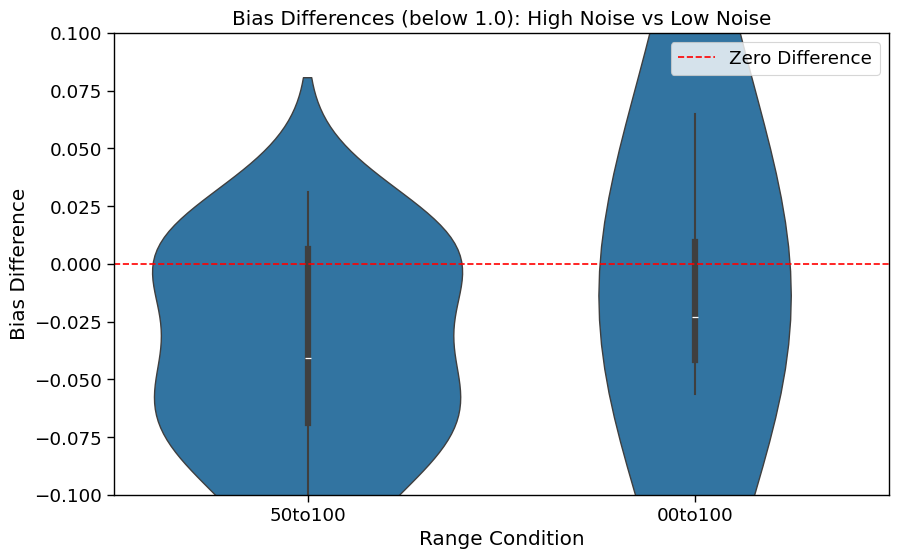

In [86]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the range conditions
range_conditions = ['50to100', '00to100']

# Create empty lists to store average bias for each condition
average_bias_high_noise = {range_cond: [] for range_cond in range_conditions}
average_bias_low_noise = {range_cond: [] for range_cond in range_conditions}
bias_differences_noise = []

# Iterate over range conditions
for range_condition in range_conditions:
    # Iterate over subjects
    for subject_id, subject_data in filtered_df.groupby('subject'):

        # Filter data for the current range condition
        range_data = subject_data[subject_data['probRange'] == range_condition]

        # Filter NaN values
        high_noise_data = range_data[range_data['noiseType'] == 'highNoise']
        low_noise_data = range_data[range_data['noiseType'] == 'lowNoise']

        # Filter rows within the specified p-value bin
        high_noise_data = high_noise_data[(high_noise_data['p'] >= 1.0 - bin_size) & (high_noise_data['p'] < 1.0 + bin_size)]
        low_noise_data = low_noise_data[(low_noise_data['p'] >= 1.0 - bin_size) & (low_noise_data['p'] < 1.0 + bin_size)]

        # Check if there are enough non-NaN values for the t-test
        if len(high_noise_data) >= 2 and len(low_noise_data) >= 2:
            t_test_result = pg.ttest(high_noise_data['bias'], low_noise_data['bias'], paired=True)

            # Append average bias for each condition and noise type
            average_bias_high_noise[range_condition].append(high_noise_data['bias'].mean())
            average_bias_low_noise[range_condition].append(low_noise_data['bias'].mean())

            # Calculate and append bias difference for each subject
            bias_difference = high_noise_data['bias'].mean() - low_noise_data['bias'].mean()
            bias_differences_noise.append({
                'Subject': subject_id,
                'Range Condition': range_condition,
                'Noise Difference': bias_difference
            })

# Perform a within-subjects t-test for each range condition
t_test_results_noise = {range_cond: pg.ttest(average_bias_high_noise[range_cond], average_bias_low_noise[range_cond], paired=True) for range_cond in range_conditions}

# Print t-test results
for range_cond in range_conditions:
    print(f"P-value for {range_cond} in High Noise vs Low Noise: {t_test_results_noise[range_cond]['p-val'][0]}")

# Convert the list of dictionaries to a DataFrame for the violin plot
bias_differences_noise_df = pd.DataFrame(bias_differences_noise)

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Range Condition', y='Noise Difference', data=bias_differences_noise_df)
plt.title('Bias Differences (below 1.0): High Noise vs Low Noise')
plt.xlabel('Range Condition')
plt.ylabel('Bias Difference')
plt.ylim(-0.1, 0.1)  # Set y-axis limits
plt.axhline(0, color='red', linestyle='--', label='Zero Difference')
plt.legend()
plt.show()


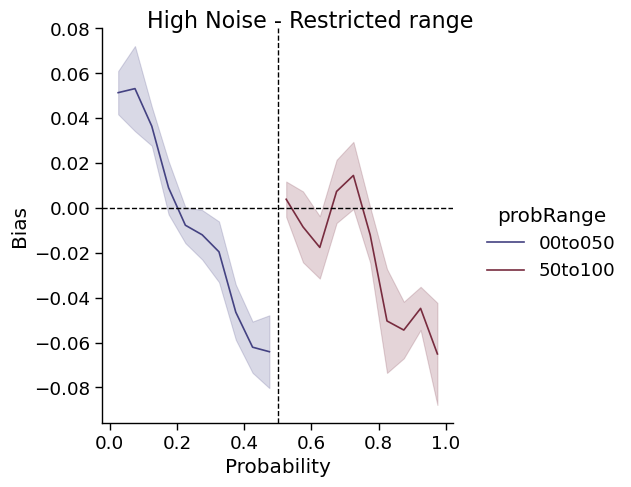

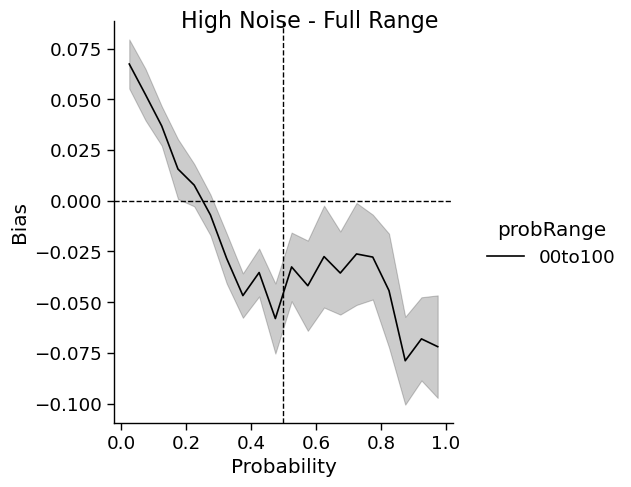

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Increase font size for better visibility in plots
sns.set_context("paper", font_scale=1.5)

# Filter data for 00to050 and 50to100 in high noise condition
filtered_data_high_noise_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & 
    (df['noiseType'] == 'highNoise') & 
    ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100 in high noise condition
filtered_data_high_noise_00to100 = df[
    (df['probRange'] == '00to100') & 
    (df['noiseType'] == 'highNoise') & 
    ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Define color palette
palette = sns.color_palette('icefire', 2)

# Create separate line plots for high noise condition
g1_high = sns.relplot(
    data=filtered_data_high_noise_00to050_50to100,
    hue='probRange',
    hue_order=['00to050', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1_high.set_axis_labels(x_var="Probability", y_var="Bias")  # Set axis labels
g1_high.fig.suptitle('High Noise - Restricted range', fontsize=16)  # Adjust font size

# Create separate line plots for high noise condition
g2_high = sns.relplot(
    data=filtered_data_high_noise_00to100,
    hue='probRange',
    hue_order=['00to100'],
    palette=['black'],  # Set color for '00to100' to black
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2_high.set_axis_labels(x_var="Probability", y_var="Bias")  # Set axis labels
g2_high.fig.suptitle('High Noise - Full Range', fontsize=16)  # Adjust font size

plt.show()


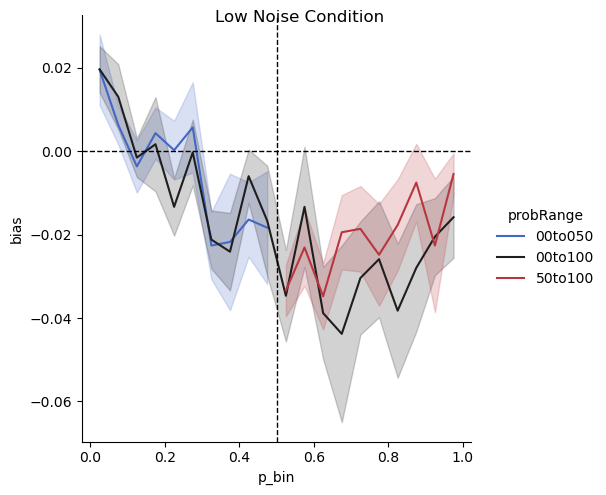

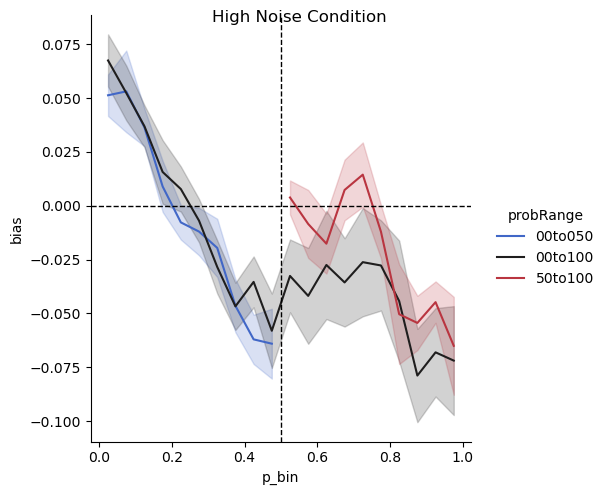

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter data for 00to050 and 50to100
filtered_data_00to050_50to100 = df[
    (df['probRange'].isin(['00to050', '50to100'])) & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Filter data for 00to100
filtered_data_00to100 = df[
    (df['probRange'] == '00to100') & ~df.index.get_level_values('subject').isin(problematic_subjects)
]

# Separate rows based on 'noiseType'
low_noise_00to050_50to100 = filtered_data_00to050_50to100[filtered_data_00to050_50to100['noiseType'] == 'lowNoise']
high_noise_00to050_50to100 = filtered_data_00to050_50to100[filtered_data_00to050_50to100['noiseType'] == 'highNoise']

low_noise_00to100 = filtered_data_00to100[filtered_data_00to100['noiseType'] == 'lowNoise']
high_noise_00to100 = filtered_data_00to100[filtered_data_00to100['noiseType'] == 'highNoise']

# Define color palette
palette = sns.color_palette('icefire', 3)

# Create separate line plots for low noise
g1_low = sns.relplot(
    data=pd.concat([low_noise_00to050_50to100, low_noise_00to100]),
    hue='probRange',
    hue_order=['00to050', '00to100', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g1_low.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g1_low.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g1_low.fig.suptitle('Low Noise Condition')

# Create separate line plots for high noise
g2_high = sns.relplot(
    data=pd.concat([high_noise_00to050_50to100, high_noise_00to100]),
    hue='probRange',
    hue_order=['00to050', '00to100', '50to100'],
    palette=palette,
    x='p_bin',
    y='bias',
    kind='line',
    errorbar='se'
)

g2_high.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g2_high.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))
g2_high.fig.suptitle('High Noise Condition')

plt.show()


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_15941/3947338309.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sns.relplot(df.drop(problematic_subjects, level='subject').groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType',


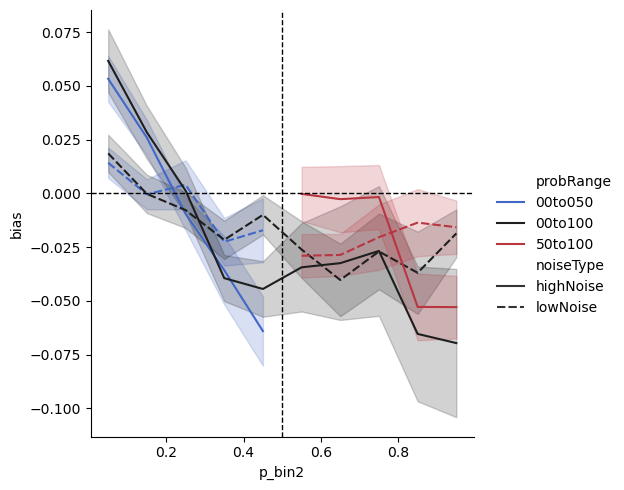

In [ ]:
palette = sns.color_palette('icefire', 3)

g = sns.relplot(df.drop(problematic_subjects, level='subject').groupby(['subject', 'p_bin2', 'probRange', 'noiseType'])[['certaintyEquivalent', 'bias']].mean().reset_index(), hue='probRange', style='noiseType', 
            hue_order=('00to050', '00to100', '50to100'),
            palette=palette, x='p_bin2', y='bias', kind='line',
            errorbar='se')

g.map(lambda *args, **kwargs: plt.axhline(0, color='k', linestyle='--', linewidth=1))
g.map(lambda *args, **kwargs: plt.axvline(0.5, color='k', linestyle='--', linewidth=1))


/var/folders/fg/ps8b9dqs3b3cgp4jb85dxwfnsyv51d/T/ipykernel_15941/2154914452.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin2'])[['bias']].mean()


Text(0.5, 0.98, 'Narrow ranges - full range')

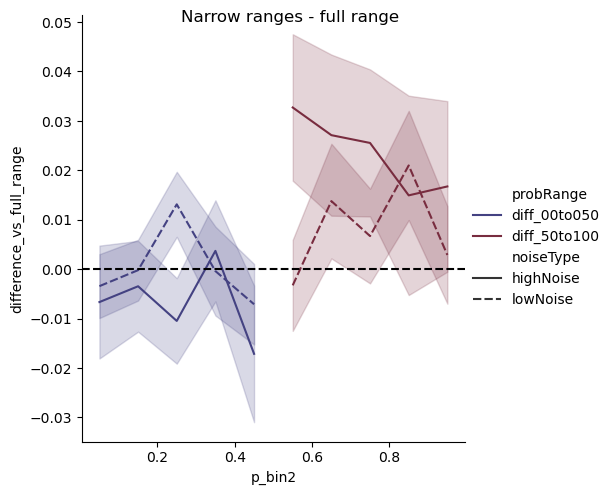

In [ ]:
tmp = df.drop(problematic_subjects, level='subject').groupby(['subject', 'probRange', 'noiseType', 'p', 'p_bin2'])[['bias']].mean()

tmp = tmp.unstack('probRange')['bias']

tmp['diff_00to050'] = tmp['00to050'] - tmp['00to100']
tmp['diff_50to100'] = tmp['50to100'] - tmp['00to100']

tmp = tmp[['diff_00to050', 'diff_50to100']].stack().to_frame('difference_vs_full_range')

g = sns.relplot(tmp.reset_index(), hue='probRange', style='noiseType', x='p_bin2', y='difference_vs_full_range', kind='line', palette=sns.color_palette('icefire', 2), errorbar='se')
plt.axhline(0.0, c='k', ls='--')

plt.suptitle('Narrow ranges - full range')

In [ ]:
import pandas as pd
import pingouin as pg

# Assuming 'tmp' is your DataFrame

# Reset the index to make 'noiseType' a regular column
tmp_reset = tmp.reset_index()

# Define the bin value
bin_value = 0.1

# Initialize empty lists to store differences and t-test results
differences = []
t_test_results = []

# Iterate over each subject
for subject in tmp_reset['subject'].unique():
    # Filter data for the current subject
    subject_data = tmp_reset[tmp_reset['subject'] == subject]

    # Filter data for highNoise condition and the specified p range (just above 0.5)
    high_noise_above_data = subject_data[
        (subject_data['noiseType'] == 'highNoise') & 
        (subject_data['p'].between(0.5 + bin_value, 0.5 + 2 * bin_value))
    ]

    # Drop NaN values in the 'difference_vs_full_range' column
    high_noise_above_data = high_noise_above_data.dropna(subset=['difference_vs_full_range'])

    # Extract the relevant columns for the paired t-test
    data_above_high = high_noise_above_data['difference_vs_full_range']

    # Filter data for highNoise condition and the specified p range (just below 0.5)
    high_noise_below_data = subject_data[
        (subject_data['noiseType'] == 'highNoise') & 
        (subject_data['p'].between(0.5 - 2 * bin_value, 0.5 - bin_value))
    ]

    # Drop NaN values in the 'difference_vs_full_range' column
    high_noise_below_data = high_noise_below_data.dropna(subset=['difference_vs_full_range'])

    # Extract the relevant columns for the paired t-test
    data_below_high = high_noise_below_data['difference_vs_full_range']

    # Calculate the difference
    difference = data_above_high.mean() - data_below_high.mean()

    # Append the difference to the list
    differences.append(difference)

# Perform a paired t-test on differences
t_test_result = pg.ttest(differences,0, paired=True)

# Output the average difference and the paired t-test result
average_difference = pd.Series(differences).mean()
print(f'Average Difference Across Subjects: {average_difference}')
print(f'Paired t-test result for the average difference: {t_test_result}')


Average Difference Across Subjects: 0.025982534837209255
Paired t-test result for the average difference:                T  dof alternative     p-val          CI95%   cohen-d  BF10  \
T-test  0.848639   19   two-sided  0.406647  [-0.04, 0.09]  0.189762  0.32   

          power  
T-test  0.12717  


/Users/sbedi/mambaforge/envs/pymc/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


In [ ]:
import pandas as pd
import pingouin as pg

# Assuming 't_test_results_df' is your DataFrame containing the subject-wise t-test results

# Calculate subject-wise differences
subjectwise_diff = t_test_results_df.pivot(index='Subject', columns='NoiseType', values='T-statistic').diff(axis=1)['highNoise']

# Drop NaN values
subjectwise_diff = subjectwise_diff.dropna()

# Perform a paired t-test on subject-wise differences
t_test_result_subjectwise = pg.ttest(subjectwise_diff, paired=True)

# Output the subject-wise differences and the paired t-test results
print(f'Subject-wise differences:\n{subjectwise_diff}')
print(f'\nPaired t-test results for subject-wise differences:')
print(t_test_result_subjectwise)


TypeError: ttest() missing 1 required positional argument: 'y'